<a href="https://colab.research.google.com/github/infotovikas/Learn-Python/blob/main/advanced/Working_with_Subplots_and_KDE_Plot%2C_Violinplots%2C_Facet_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [ ]:
os.getcwd()

In [2]:
movies = pd.read_csv('/content/sample_data/Movie-Ratings.csv')

In [3]:
len(movies)

559

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillions', 'Year']

In [7]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [11]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [ ]:
# Chart 4 - KDE Plot

In [13]:
from ast import increment_lineno
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

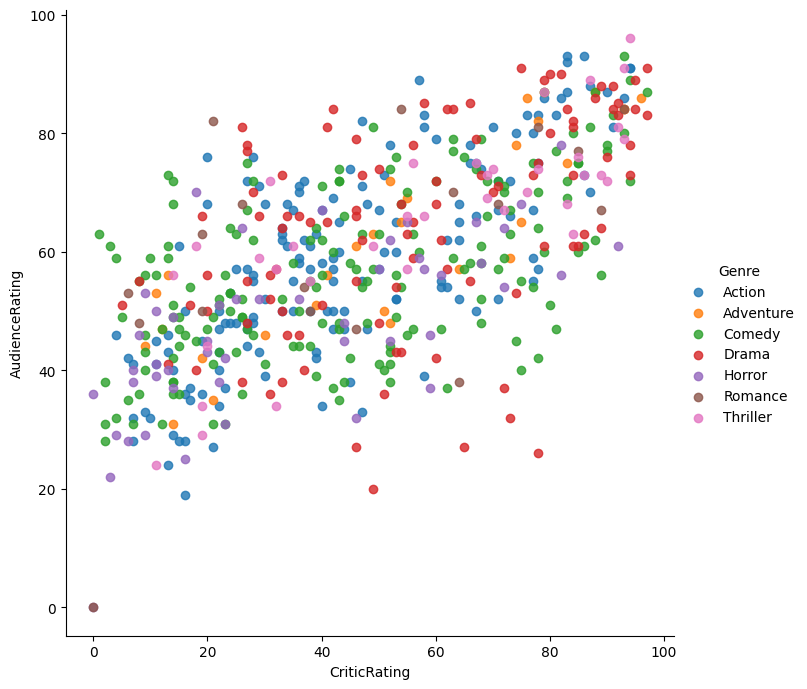

In [14]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', height=7, aspect=1)

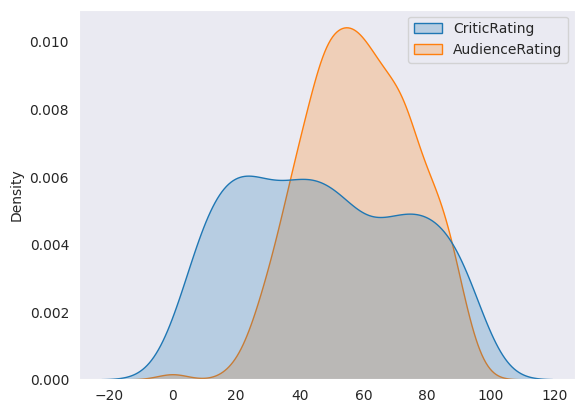

In [18]:
#k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating) # this will give error
#k1 = sns.kdeplot(data=movies[['CriticRating', 'AudienceRating']], shade=True, shade_lowest=False, cmap='Reds')
k1 = sns.kdeplot(data=movies[['CriticRating', 'AudienceRating']], shade=True, shade_lowest=False)

In [ ]:
#########################################################################################################################################

In [ ]:
### Working with Subplots

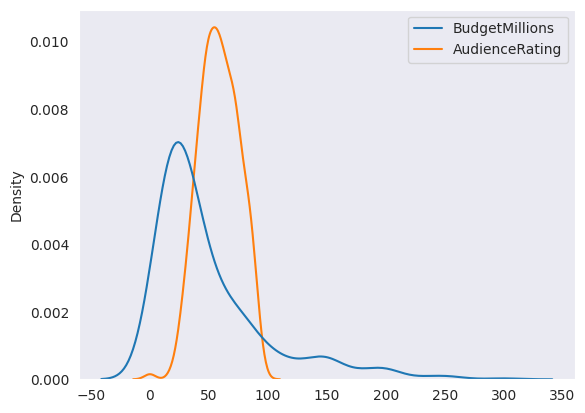

In [15]:
#k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)
sns.set_style('dark')
k1 = sns.kdeplot(data=movies[['BudgetMillions', 'AudienceRating']])

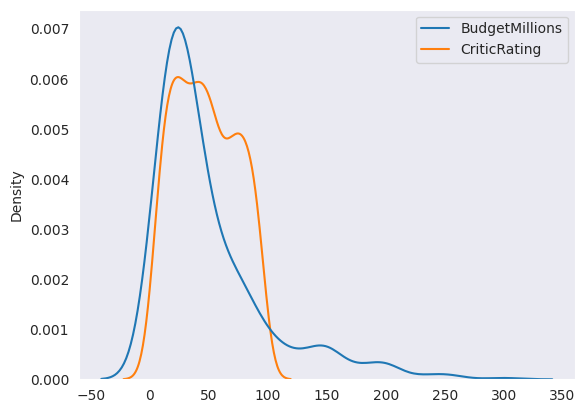

In [16]:
k1 = sns.kdeplot(data=movies[['BudgetMillions', 'CriticRating']])

[(-20.0, 160.0)]

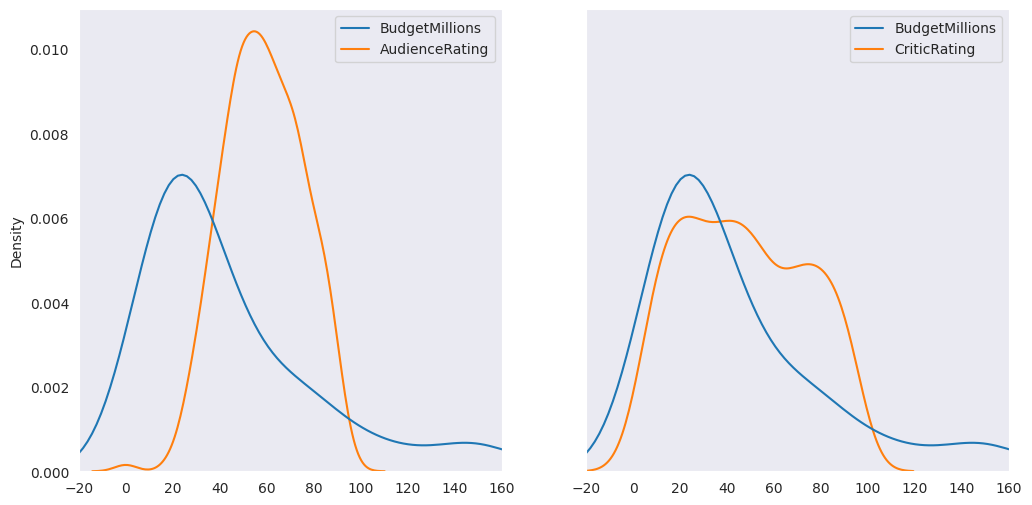

In [17]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(data=movies[['BudgetMillions', 'AudienceRating']], ax=axes[0])
k2 = sns.kdeplot(data=movies[['BudgetMillions', 'CriticRating']], ax=axes[1])
k1.set(xlim=(-20,160))

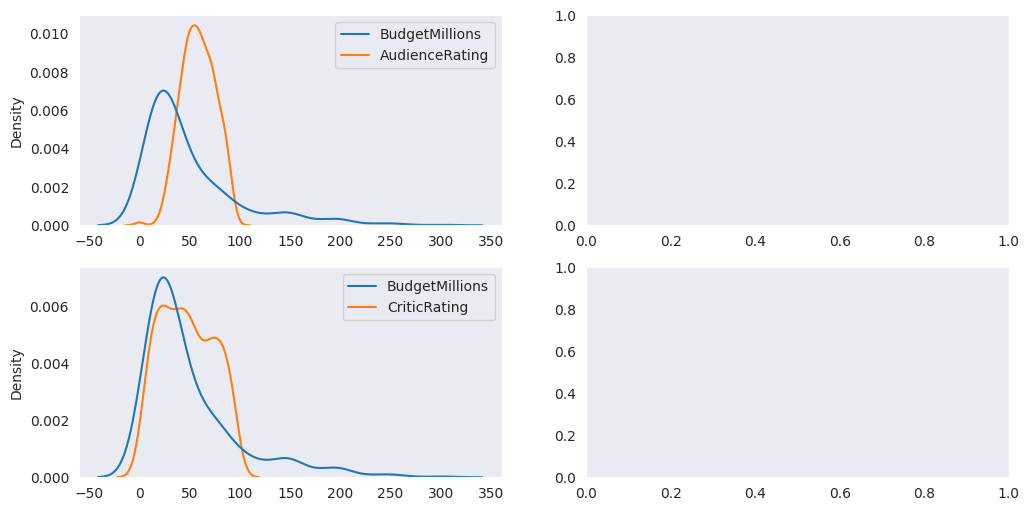

In [19]:
f, axes = plt.subplots(2,2, figsize=(12,6))
k1 = sns.kdeplot(data=movies[['BudgetMillions', 'AudienceRating']], ax=axes[0,0])
k2 = sns.kdeplot(data=movies[['BudgetMillions', 'CriticRating']], ax=axes[1,0])

In [20]:
axes

array([[<Axes: ylabel='Density'>, <Axes: >],
       [<Axes: ylabel='Density'>, <Axes: >]], dtype=object)

In [ ]:
#####################################################################################################################################################

In [ ]:
### Violin Plot

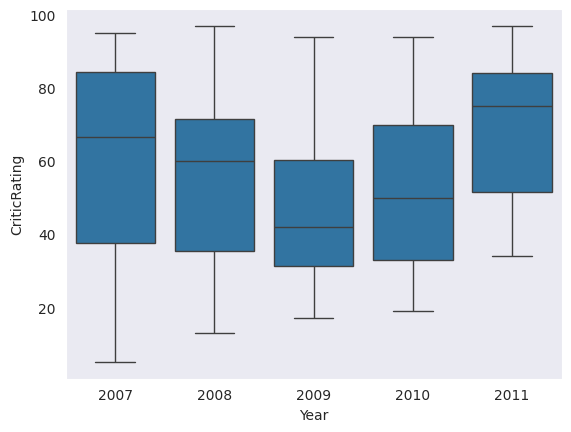

In [21]:
#x = sns.boxplot(data=movies, x='Genre', y='CriticRating')
x = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

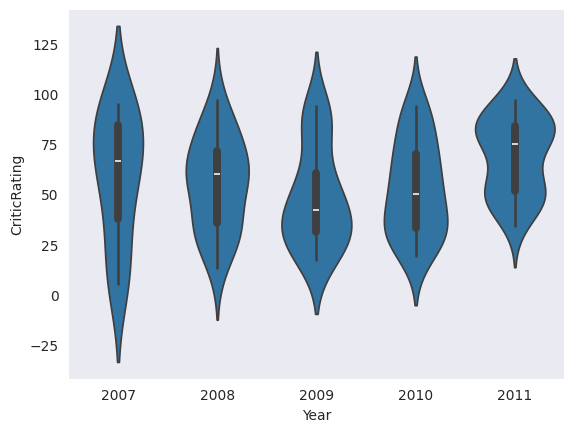

In [22]:
#y = sns.violinplot(data=movies, x='Genre', y='CriticRating')
y = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

In [ ]:
################################################################################################################################################

In [ ]:
### Creating a Facet Grid

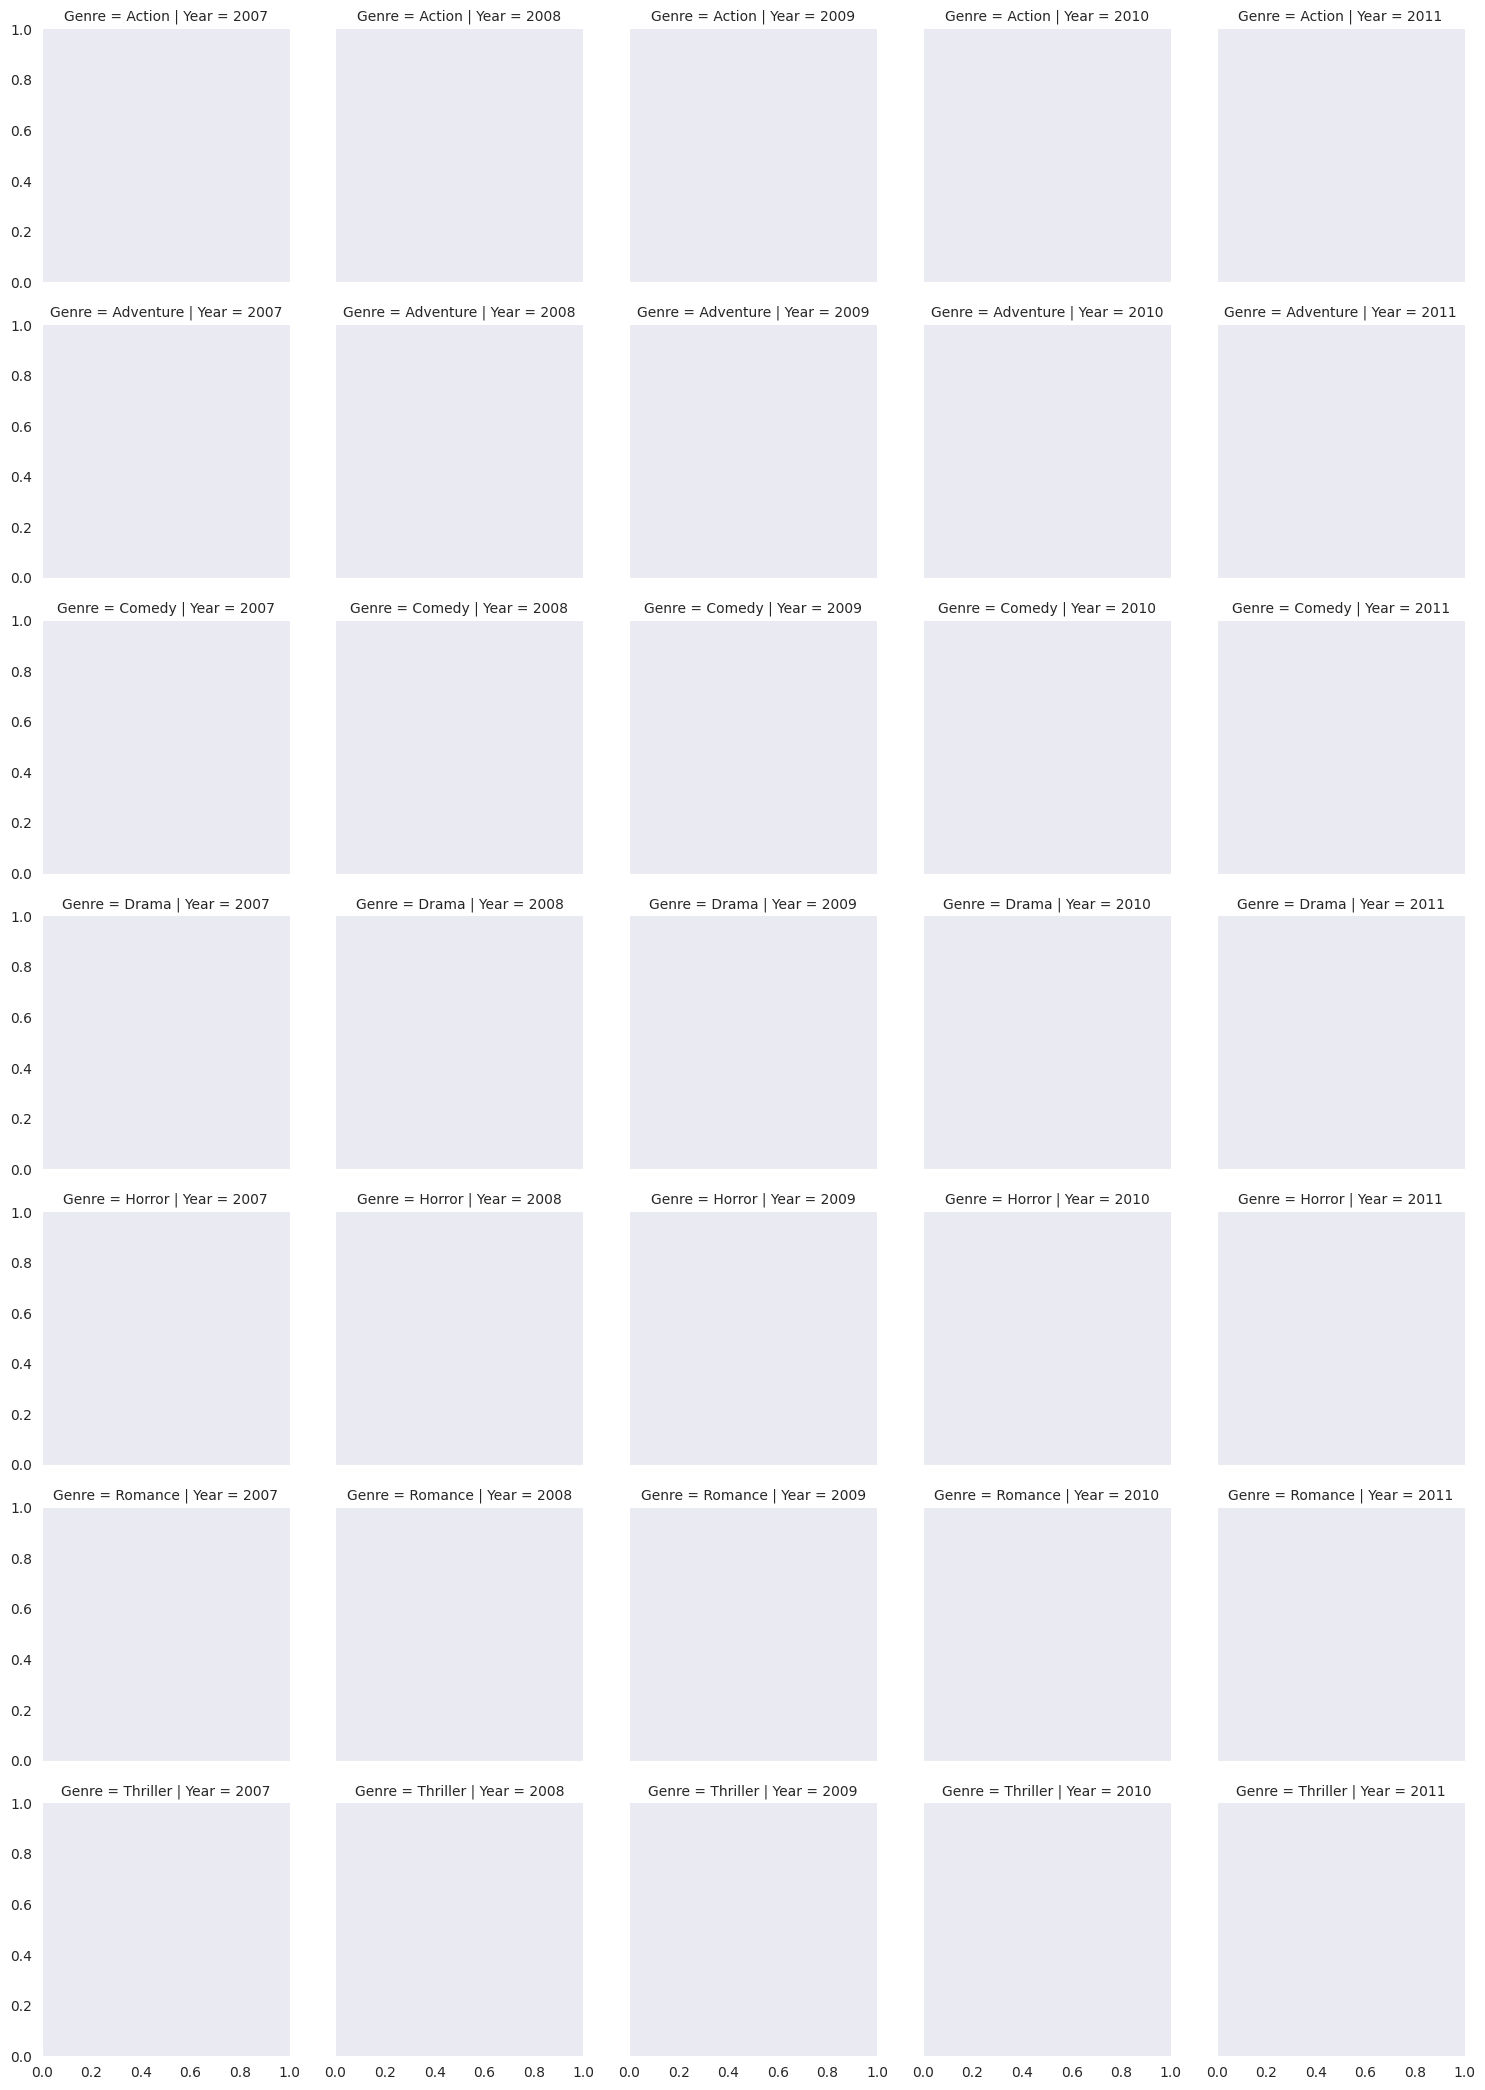

In [25]:
#fg = sns.FacetGrid(movies, row='Genre', hue='Genre')
fg = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

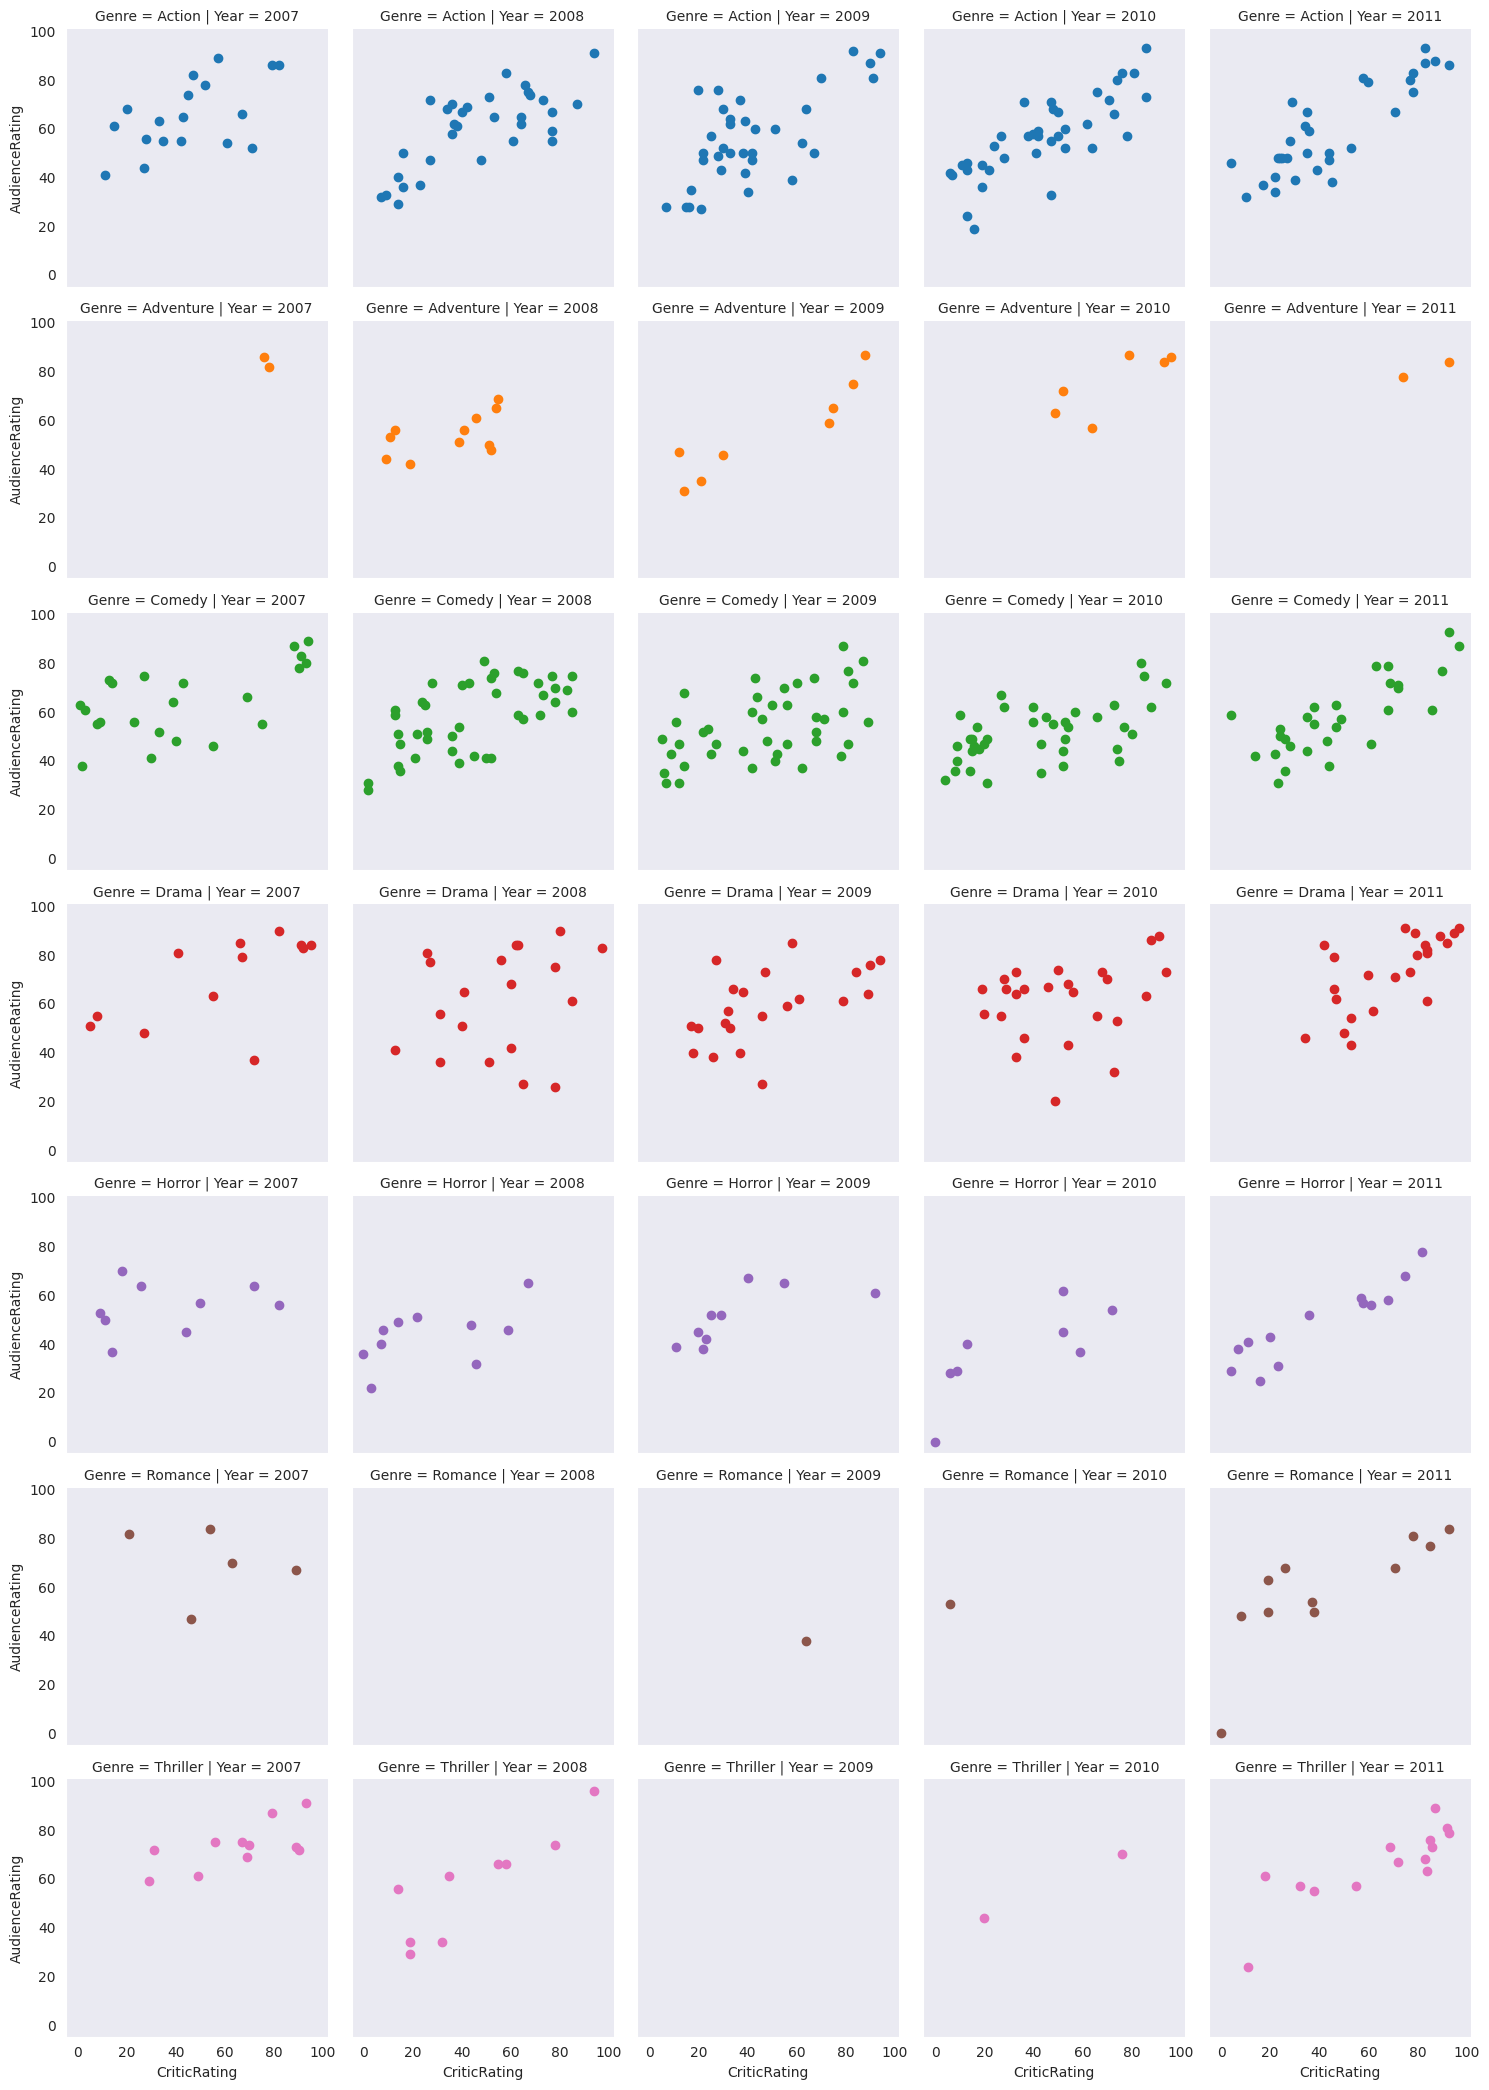

In [27]:
#fg = fg.map(plt.scatter, movies.CriticRating, movies.AudienceRating)
#plt.scatter(movies.CriticRating, movies.AudienceRating)
fg = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre') # as we already passed movies so we can directly use CriticRating and AudienceRating in below
fg = fg.map(plt.scatter, 'CriticRating', 'AudienceRating')

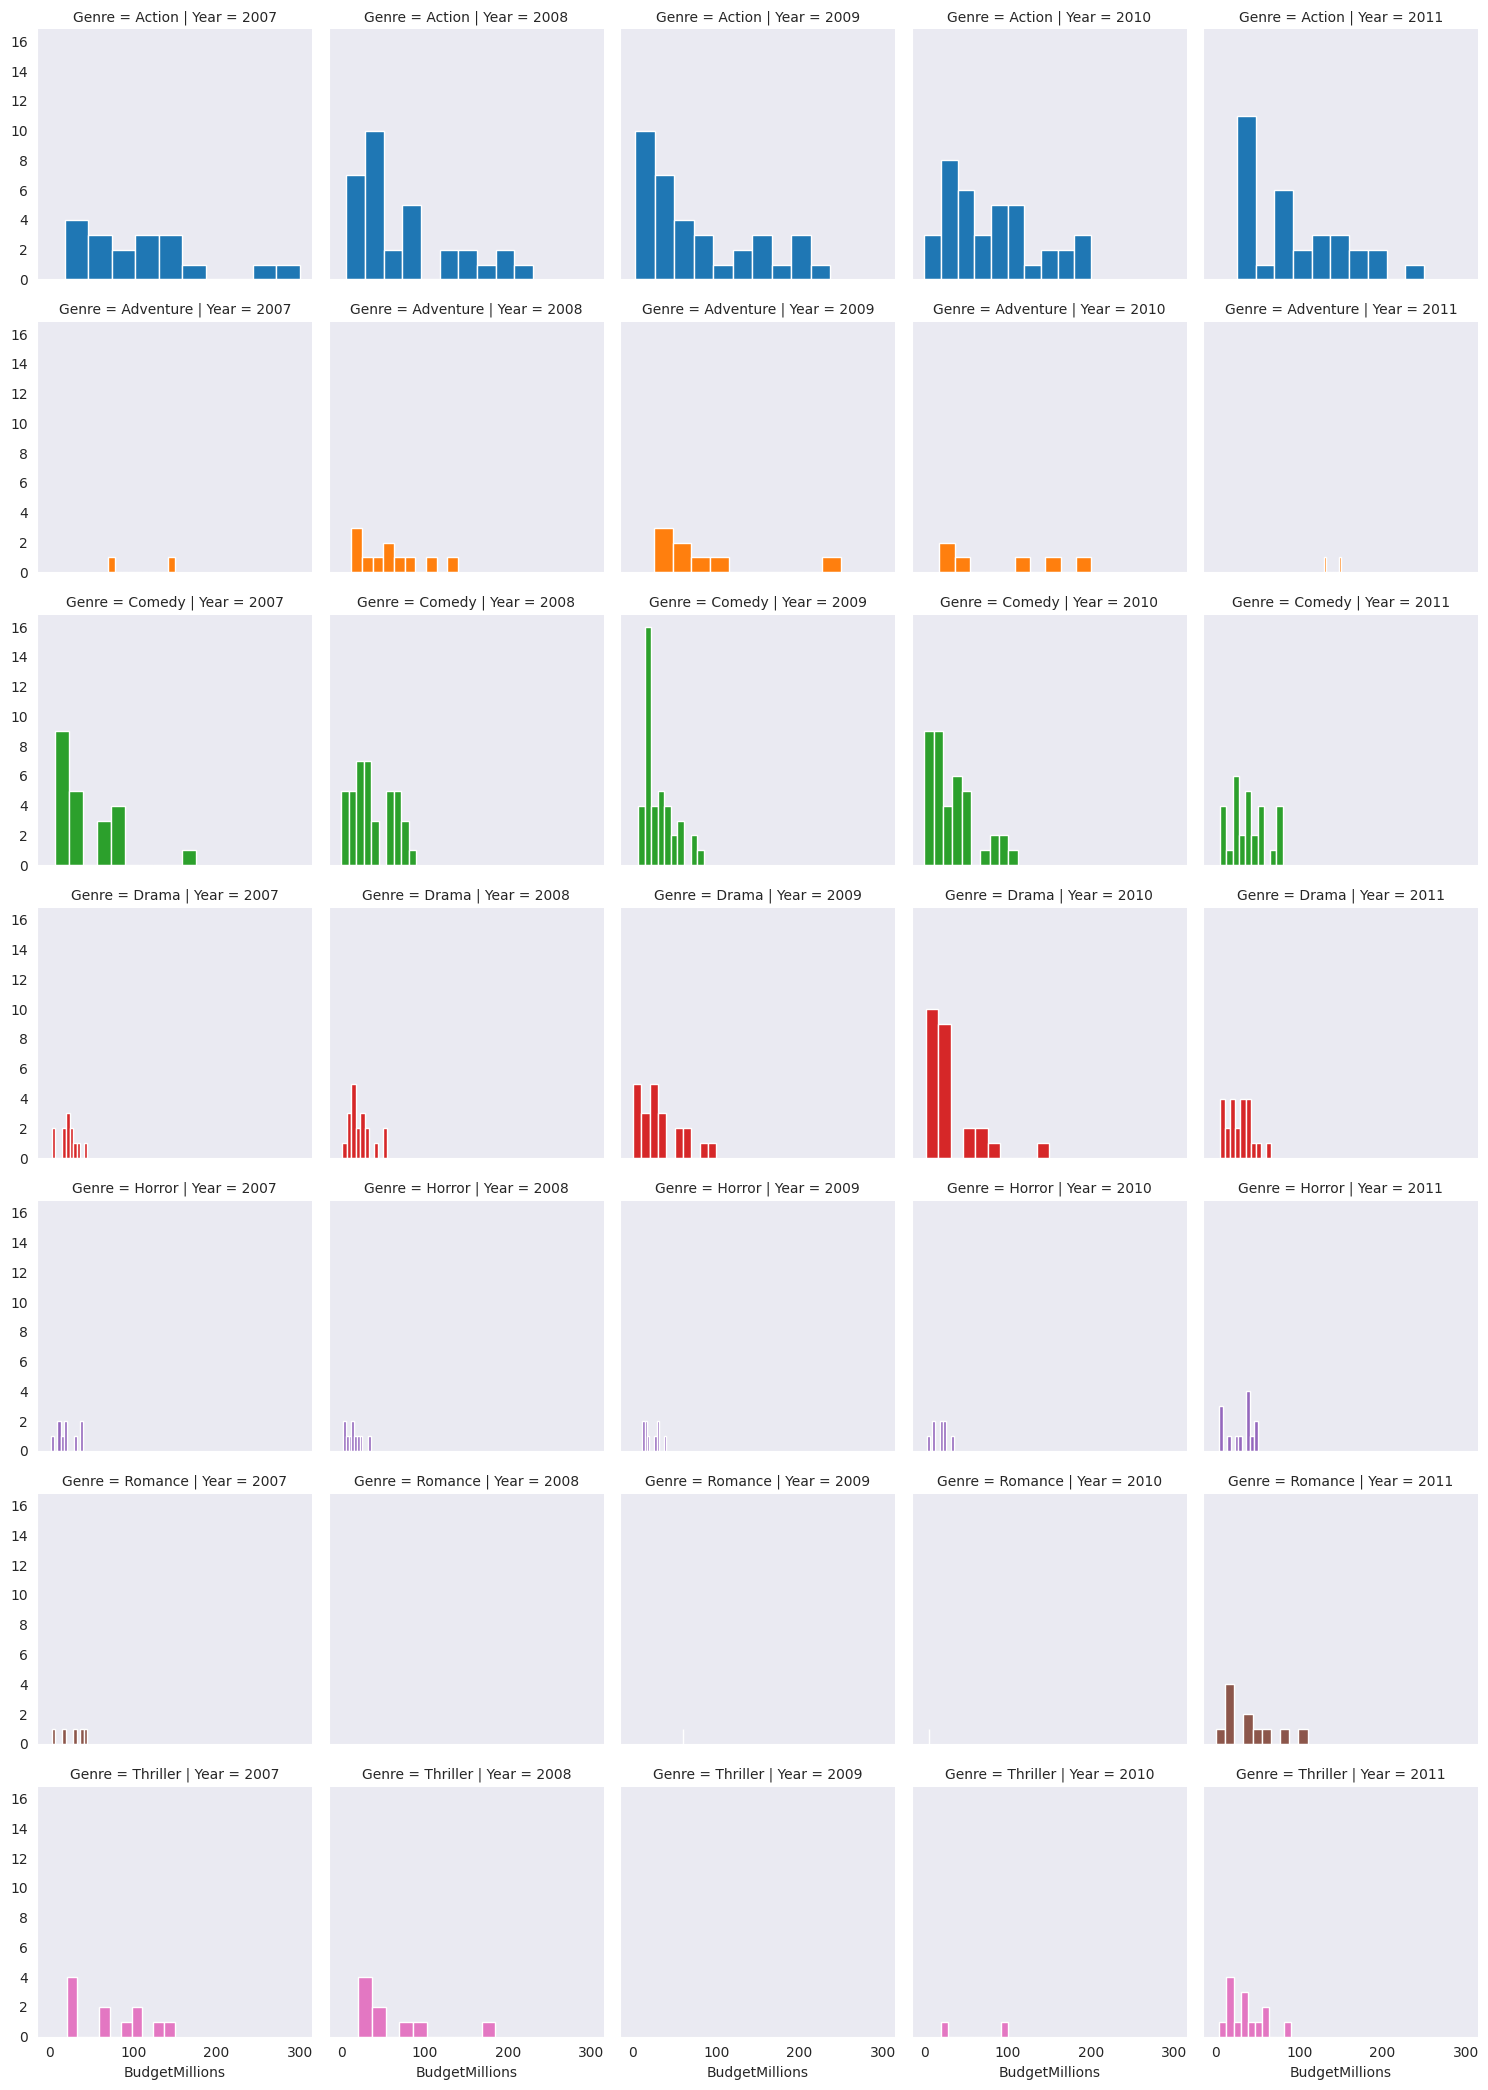

In [28]:
# We can populate any type of chart in Facet Grid. Example- Below is with Histograms
fg = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
fg = fg.map(plt.hist, 'BudgetMillions')

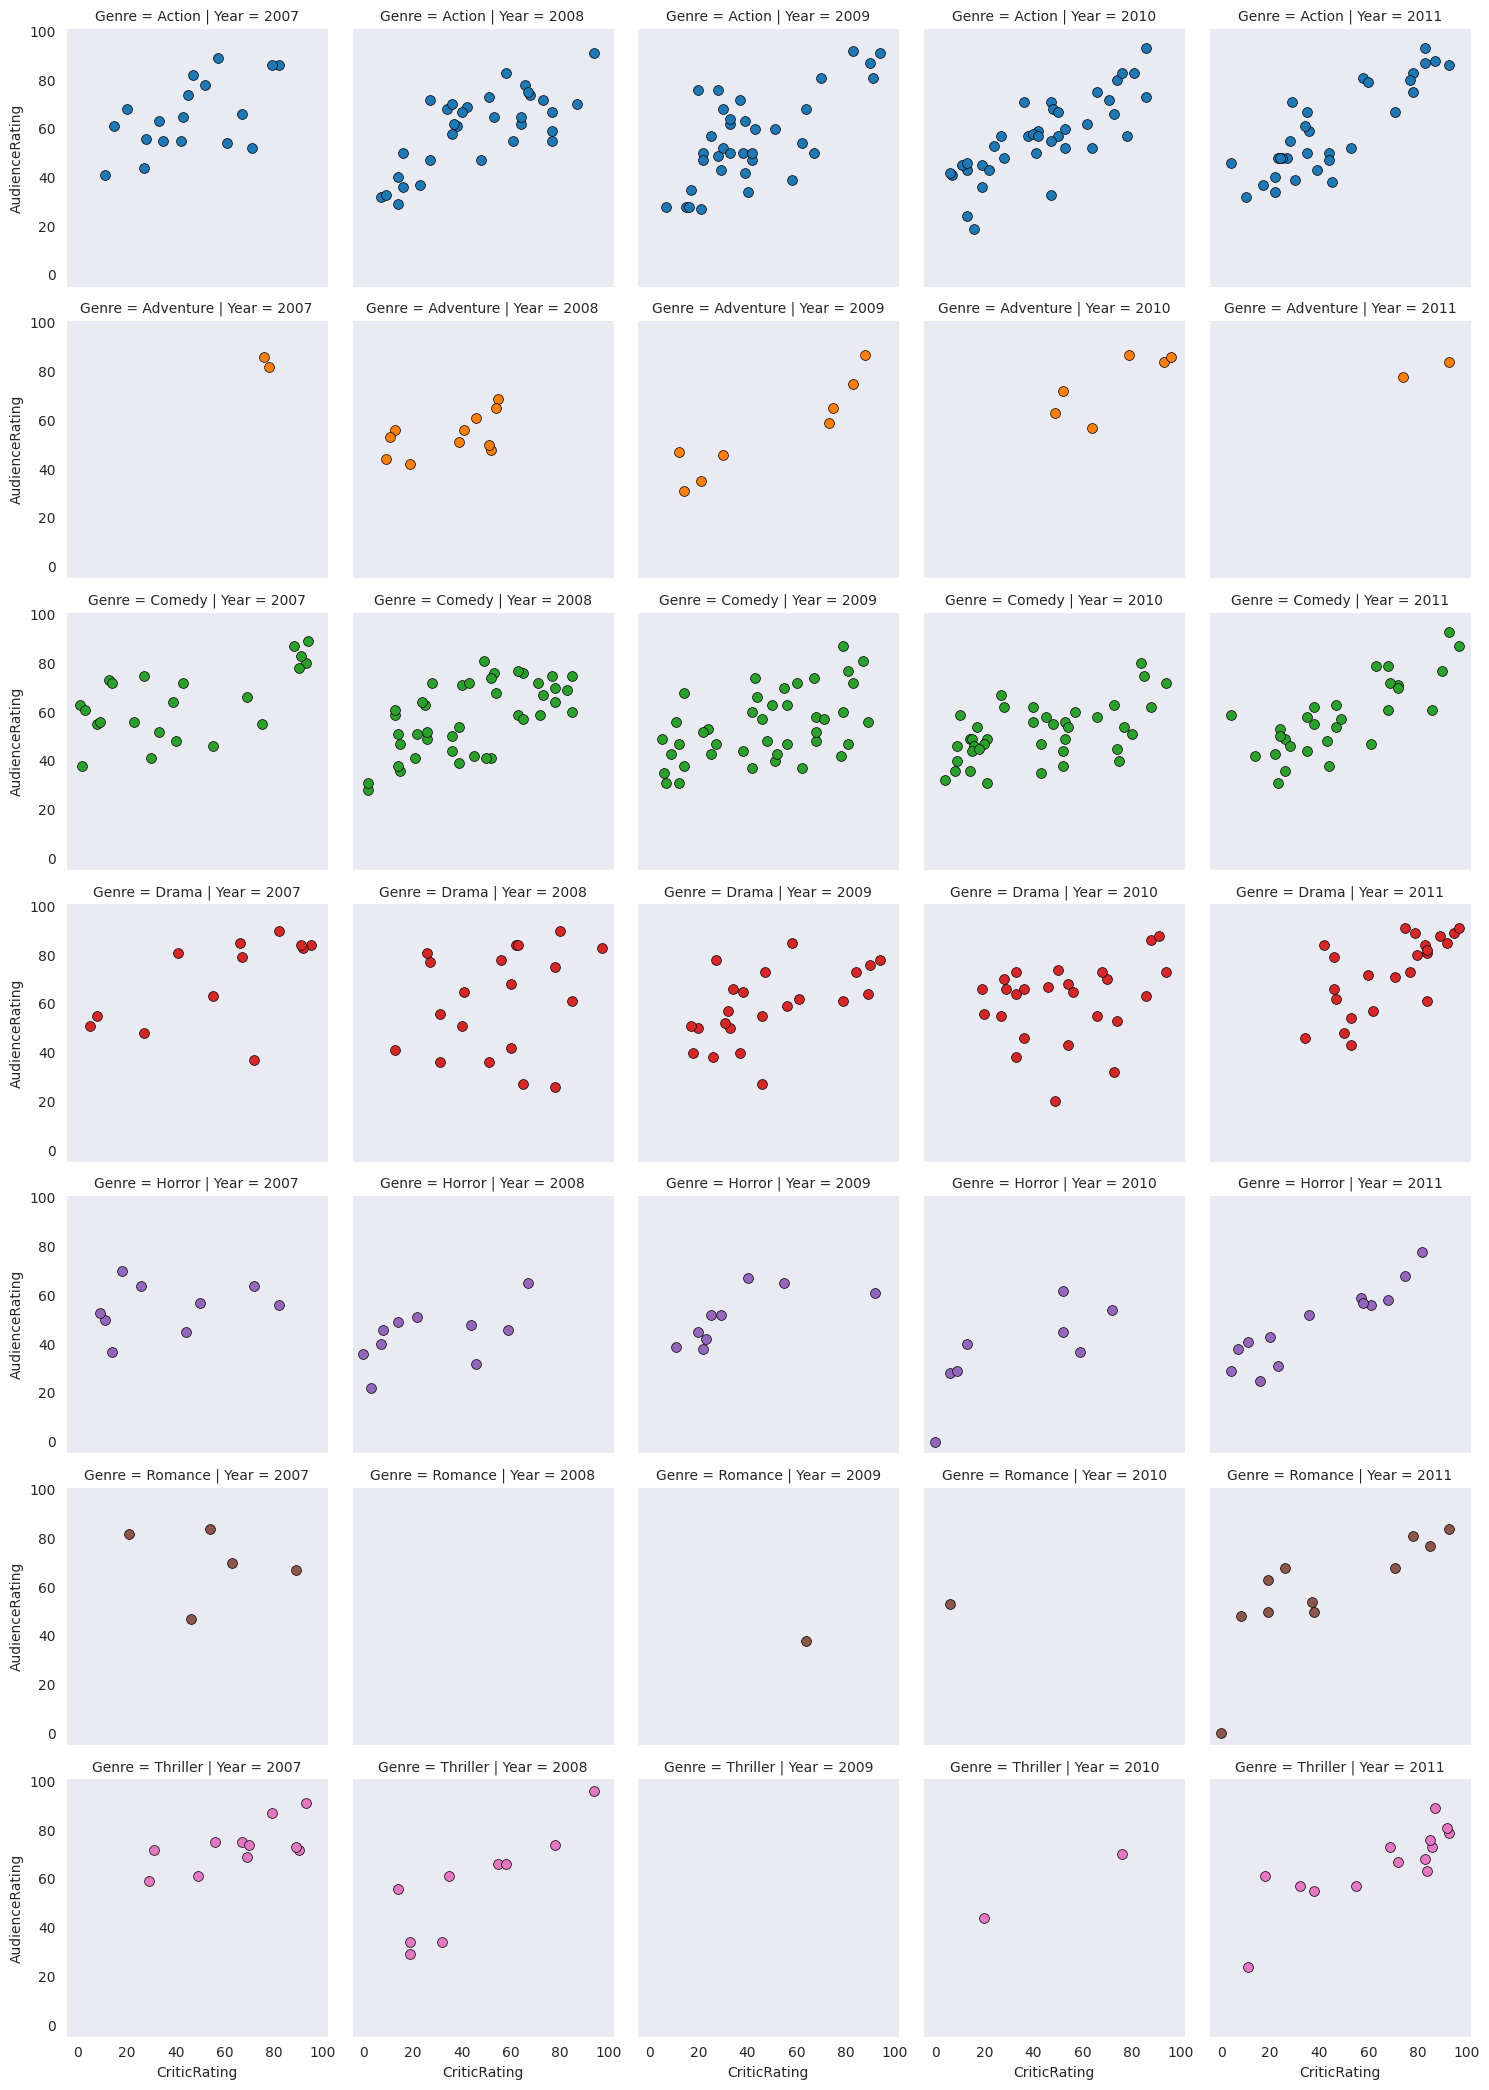

In [29]:
## Back to the scatterplots:
fg = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
fg = fg.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

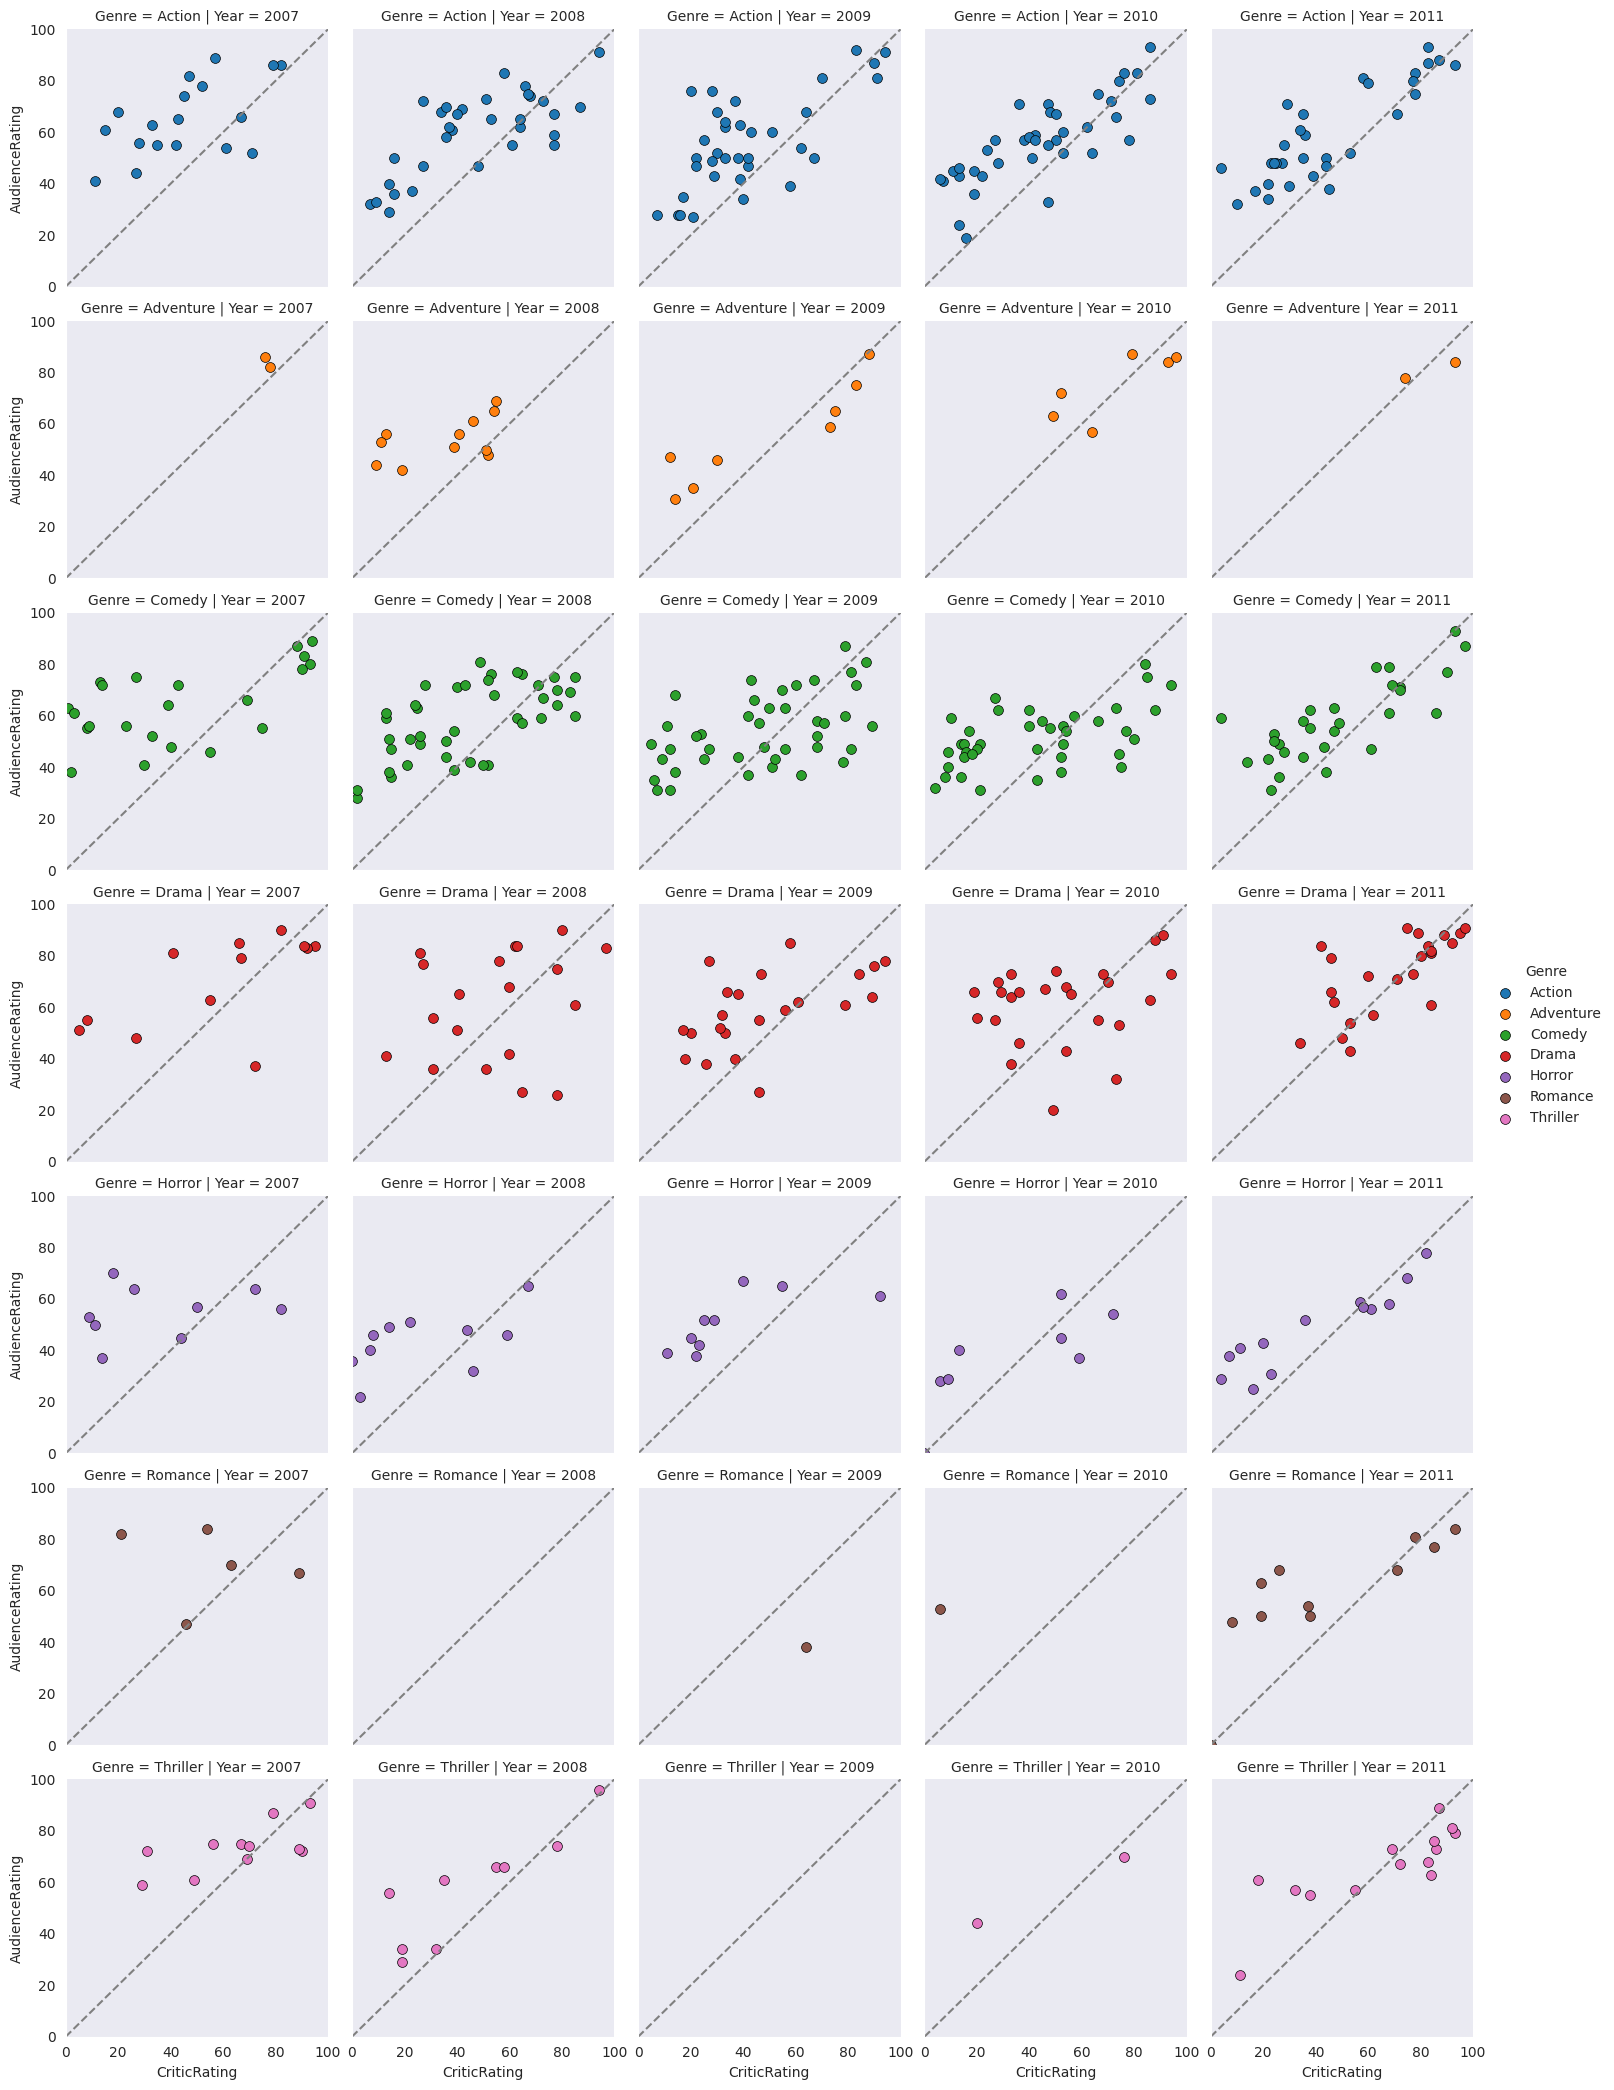

In [33]:
## Controlling Axes(Coordinates) and adding Diagonals:
fg = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
fg = fg.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
fg.set(xlim=(0,100), ylim=(0,100))
for ax in fg.axes.flat:
  ax.plot((0,100),(0,100), c='gray', ls='--')
fg.add_legend()